In [3]:
using QuantumOptics
using PyPlot

In [142]:
#Basis states
basis = NLevelBasis(6);
g = nlevelstate(basis, 1);
p1 = nlevelstate(basis, 2);
p2 = nlevelstate(basis, 2);
p3 = nlevelstate(basis, 2);
r = nlevelstate(basis, 3);
gt = nlevelstate(basis, 4);

In [143]:
#Operators
σgp1 = g ⊗ dagger(p1);
σp1g = p1 ⊗ dagger(g);
σgp2 = g ⊗ dagger(p2);
σp2g = p2 ⊗ dagger(g);
σgp3 = g ⊗ dagger(p3);
σp3g = p3 ⊗ dagger(g);

σp1r = p1 ⊗ dagger(r);
σrp1 = r ⊗ dagger(p1);
σp2r = p2 ⊗ dagger(r);
σrp2 = r ⊗ dagger(p2);
σp3r = p3 ⊗ dagger(r);
σrp3 = r ⊗ dagger(p3);

np1 = p1 ⊗ dagger(p1);
np2 = p2 ⊗ dagger(p2);
np3 = p3 ⊗ dagger(p3);
nr = r ⊗ dagger(r);

σgtp1 = gt ⊗ dagger(p1);
σp1gt = p1 ⊗ dagger(gt);
σgtp2 = gt ⊗ dagger(p2);
σp2gt = p2 ⊗ dagger(gt);
σgtp3 = gt ⊗ dagger(p3);
σp3gt = p3 ⊗ dagger(gt);

In [144]:
#Damping
Γ = 2.0*π * 6;
J = [
    sqrt(1/4 * Γ) * σgp1, sqrt(3/4 * Γ) * σgtp1,
    sqrt(1/4 * Γ) * σgp2, sqrt(3/4 * Γ) * σgtp2,
    sqrt(1/4 * Γ) * σgp3, sqrt(3/4 * Γ) * σgtp3
    ];

In [134]:
Δ = -2.0*π * 740;
δ = 0.0;
Ω = 2*π;

In [178]:
function simulation(tspan, Ωr, Ωb, Δ; ρ0=g ⊗ dagger(g), δ=false)
    if δ==false
        δ = -(Ωr^2 - Ωb^2)/(4.0*Δ);
    end;
    
    H = -Δ *np1 -(Δ+2.0*π*157.0) *np2 -(Δ+2π+2*π*(157.0+267.0)) *np3 
        -δ*nr
        + Ωr/2.0 * (σgp1 + σp1g) + Ωb/2.0 * (σp1r + σrp1) 
        + Ωr/2.0 * (σgp2 + σp2g) + Ωb/2.0 * (σp2r + σrp2)
        + Ωr/2.0 * (σgp3 + σp3g) + Ωb/2.0 * (σp3r + σrp3);
    tout, ρ = timeevolution.master(tspan, ρ0, H, J)
    return ρ
end;

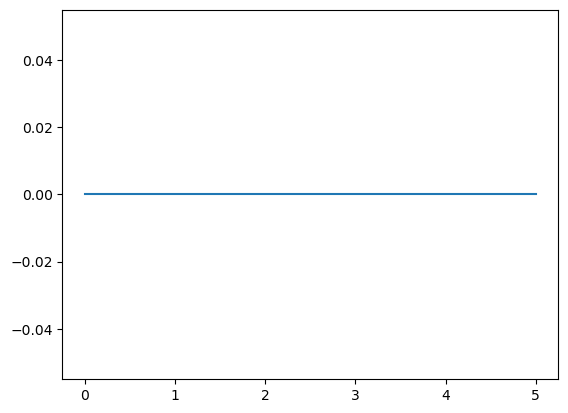

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15901bf40>

In [186]:
tspan = [0.0:0.01:5.0;];
ρ = simulation(tspan, 2π*47, 2π*47, Δ; δ=-0.5)

plot(tspan, real(expect(nr, ρ)))

In [180]:
res = [];
δ0 = [-10.0:0.1:10.0;];

for δi in δ0
    ρ = simulation(tspan, 2π*47, 2π*47, Δ; δ=-δi);
    append!(res, maximum(real(expect(nr, ρ))))
end;

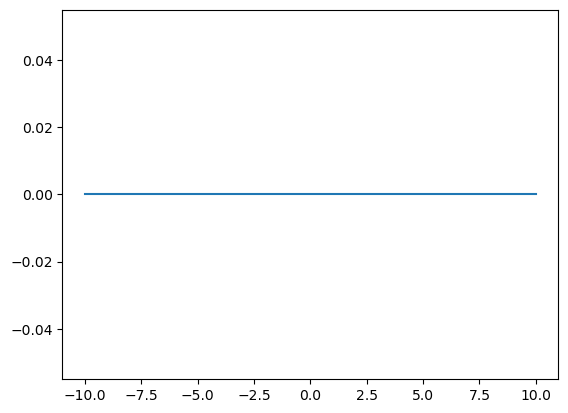

-10.0

In [181]:
plot(δ0, res)

δ0[argmax(res)]

In [182]:
println(((2π*47/2)^2-(2π*47*2)^2)/(4*Δ))
println(((2π*47/1.5)^2-(2π*47*1.5)^2)/(4*Δ))

17.58389739471247
8.46632096782452


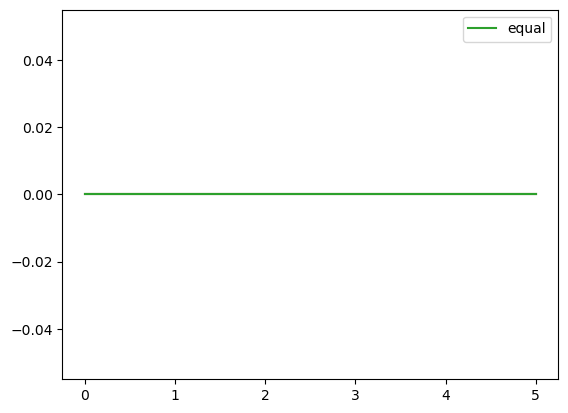

PyObject <matplotlib.legend.Legend object at 0x159518550>

In [183]:
ρ1 = simulation(tspan, 2π*47*1.5, 2π*47/1.5, Δ; δ=8.46);
ρ2 = simulation(tspan, 2π*47/1.5, 2π*47*1.5, Δ; δ=-8.46);
ρ = simulation(tspan, 2π*47, 2π*47, Δ;);

plot(tspan, expect(nr, ρ1));
plot(tspan, expect(nr, ρ2));
plot(tspan, expect(nr, ρ), label="equal");

legend()